In [142]:
# Elaborar un modelo predictivo utilizando redes neuronales en
# Python para resolver un problema de aprendizaje de máquina.

# Ejercicio Guiado: Clasificación de prendas de vestir

# La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y
# cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de
# nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes
# están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas,
# donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.


In [143]:
# 1. Instale el ambiente de Tensorflow

# pip install tensorflow


In [144]:
# 2. Carga de la data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Cargamos la data
data = keras.datasets.fashion_mnist

# Cargamos la data
# (train_images, train_labels), (test_images, test_labels) = data.load_data()
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ["Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]


Cantidad de registros de entrenamiento:  60000
Cantidad de registros de prueba:  10000
Cantidad de atributos:  (60000, 28, 28)
Tipo de datos de los atributos:  uint8
Tipo de datos de las etiquetas:  uint8
Valores únicos de las etiquetas:  [0 1 2 3 4 5 6 7 8 9]
Cantidad de imágenes para entrenamiento:  60000


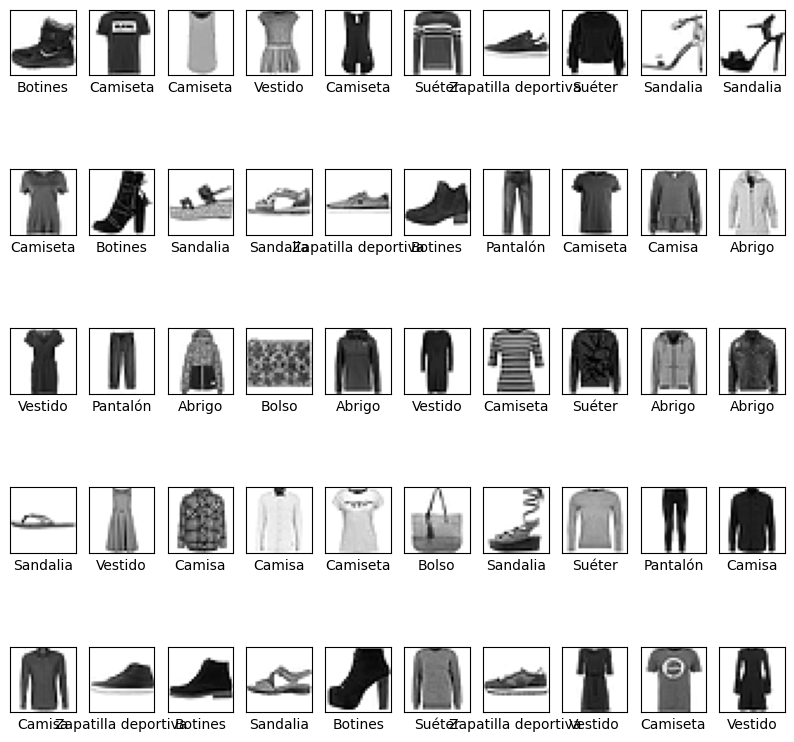

In [145]:
# 3. Descripción de la base de datos


# 3.1. Cantidad de registros
print("Cantidad de registros de entrenamiento: ", len(train_images))
print("Cantidad de registros de prueba: ", len(test_images))

# 3.2. Cantidad de atributos
print("Cantidad de atributos: ", train_images.shape)

# 3.3. Tipo de datos de los atributos
print("Tipo de datos de los atributos: ", train_images.dtype)

# 3.4. Tipo de datos de las etiquetas
print("Tipo de datos de las etiquetas: ", train_labels.dtype)

# 3.5. Valores únicos de las etiquetas
print("Valores únicos de las etiquetas: ", np.unique(train_labels))

print("Cantidad de imágenes para entrenamiento: ", len(train_images))
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [146]:
# 4. Configuración de la red neuronal

# 4.1. Normalización de los datos


train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Nota Importante:
# train_images se divide entre 255.0 para que los valores estén entre 0 y 1.
# Hacer esto hace que sea más fácil para la red neuronal aprender.


# 4.2. Definición de la red neuronal


In [147]:
# Add a channel dimension, and scale features to be in [0, 1]
train_images = np.expand_dims(train_images, axis=-1) / 16

print(train_images.shape)

input_layer = Input(shape=train_images.shape[1:])

# Convolutional layers
conv1 = Conv2D(8, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
flat = Flatten()(conv2)

# Fully connected layers
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(10, activation='softmax')(dense2)

model = Model(input_layer, output_layer)


(60000, 28, 28, 1)


In [148]:
# compilar

opt = keras.optimizers.Adam(learning_rate=0.01)  # Optimizer
model.compile(
    ##optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy'],  # Accuracy performance metric
    optimizer=opt
)
model.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 flatten_15 (Flatten)        (None, 1936)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               247936    
                                                          

In [149]:
# entrenamiento

history = model.fit(train_images,  # Train the model using the training set...
                    train_labels,  # ...holding out 10% of the data for validation
                    epochs=20,  # Run for 20 epochs
                    # Use the validation set
                    validation_data=(test_images, test_labels),
                    batch_size=64  # Use 64 image batches in training
                    )


Epoch 1/20
938/938 [==============================] - 14s 13ms/step - loss: 0.5283 - accuracy: 0.8037 - val_loss: 2.9614 - val_accuracy: 0.8011
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3578 - accuracy: 0.8677 - val_loss: 3.2871 - val_accuracy: 0.7981
Epoch 3/20
938/938 [==============================] - 11s 12ms/step - loss: 0.3196 - accuracy: 0.8813 - val_loss: 2.9921 - val_accuracy: 0.8255
Epoch 4/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2992 - accuracy: 0.8907 - val_loss: 3.0774 - val_accuracy: 0.8305
Epoch 5/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2864 - accuracy: 0.8944 - val_loss: 2.9106 - val_accuracy: 0.8268
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2747 - accuracy: 0.8984 - val_loss: 3.8858 - val_accuracy: 0.8011
Epoch 7/20
938/938 [==============================] - 12s 12ms/step - loss: 0.2616 - accuracy: 0.9038 - val_loss: 3.5211 - val_accuracy:

In [ ]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels), batch_size=128)


Epoch 1/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0832 - accuracy: 0.9700 - val_loss: 8.9725 - val_accuracy: 0.7747
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0769 - accuracy: 0.9726 - val_loss: 8.2904 - val_accuracy: 0.7975
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0729 - accuracy: 0.9745 - val_loss: 9.2013 - val_accuracy: 0.7864
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0721 - accuracy: 0.9737 - val_loss: 8.4579 - val_accuracy: 0.8072
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0663 - accuracy: 0.9756 - val_loss: 11.2183 - val_accuracy: 0.7662
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0604 - accuracy: 0.9787 - val_loss: 11.3394 - val_accuracy: 0.7794
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0572 - accuracy: 0.9795 - val_loss: 10.0556 - val_accuracy: 0.

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), batch_size=256,
                    )


Epoch 1/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 18.8442 - val_accuracy: 0.7814
Epoch 2/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 19.7758 - val_accuracy: 0.7804
Epoch 3/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 20.7296 - val_accuracy: 0.7811
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 20.5308 - val_accuracy: 0.7808
Epoch 5/20
235/235 [==============================] - 7s 30ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 20.8447 - val_accuracy: 0.7813
Epoch 6/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 22.9930 - val_accuracy: 0.7770
Epoch 7/20
235/235 [==============================] - 7s 30ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 22.1215 - val_accuracy:

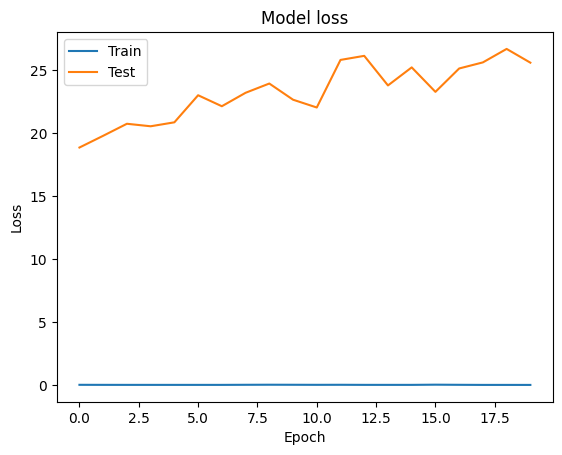

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


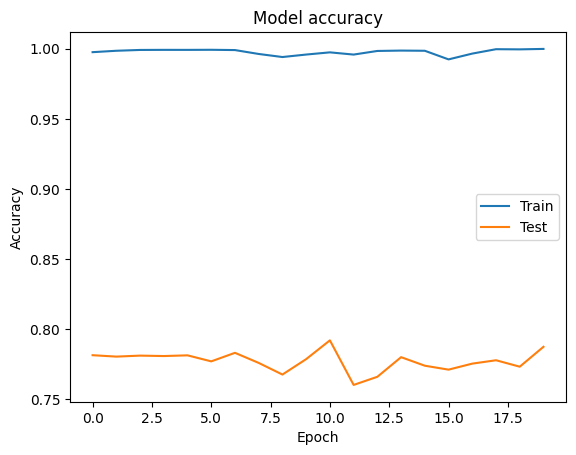

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()
